# CPSC 322: HW 3

Name: David Giacobbi

Term: Fall 2023

### 1. Import libraries

In [2]:
from data_table import *
from data_util import *

### 2. Load each data set and combine on model year and model name with non-matches

In [3]:
mpg_table = DataTable(["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "model name"])
prices_table = DataTable(["model name", "model year", "msrp"])

mpg_table.load("auto-mpg.txt")
prices_table.load("auto-prices.txt")

combine_table = DataTable.combine(mpg_table, prices_table, ["model year", "model name"], non_matches=True)

### 3. Print first 15 rows of combined dataset (with MSRP column)

In [4]:
print(combine_table.rows([i for i in range(15)]))

mpg      cylinders    displacement    horsepower    weight    acceleration    model year    origin  model name                        msrp
-----  -----------  --------------  ------------  --------  --------------  ------------  --------  --------------------------------  ------
18.0             8             307           130      3504            12              70         1  chevrolet chevelle malibu         2881
15.0             8             350           165      3693            11.5            70         1  buick skylark 320                 2847
18.0             8             318           150      3436            11              70         1  plymouth satellite                2831
16.0             8             304           150      3433            12              70         1  amc rebel sst
17.0             8             302           140      3449            10.5            70         1  ford torino                       2778
15.0             8             429           198  

### 4. Print number of rows of combined table

In [5]:
print("Row Count:", combine_table.row_count())

Row Count: 331


### 5. Print the duplicate instances in the combined table

In [6]:
print(duplicate_instances(combine_table))

  mpg    cylinders    displacement    horsepower    weight    acceleration    model year    origin  model name      msrp
-----  -----------  --------------  ------------  --------  --------------  ------------  --------  ------------  ------
 19              6             232           100      2634            13              71         1  amc gremlin     1999
 18              6             250            88      3139            14.5            71         1  ford mustang    3322
 19              4             122            85      2310            18.5            73         1  ford pinto      2021
 21.5            3              80           110      2720            13.5            77         3  mazda rx-4      5470


### 6. Remove the duplicates from the combined table

In [7]:
combine_table = remove_duplicates(combine_table)

### 7. Print the new number of rows in the combined table (four fewer)

In [8]:
print("New Row Count:", combine_table.row_count())

New Row Count: 327


### 8. Print the unique values for cylinders, origin, and model year columns (cylinders and origin have missing values)

In [9]:
print(distinct_values(combine_table, ["cylinders"]))
print(distinct_values(combine_table, ["origin"]))
print(distinct_values(combine_table, ["model year"]))

[8, 4, 6, 3, 5, '']
[1, 2, 3, '']
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79]


### 9. Check if there are any missing values in MSRP column

In [10]:
print(distinct_values(combine_table, ["msrp"]))

[2881, 2847, 2831, '', 2778, 3137, 3132, 3174, 3164, 3114, 3210, 3191, 2766, 3914, 3126, 4226, 2170, 2547, 1995, 2090, 2150, 1919, 1999, 3003, 2950, 3100, 3813, 4154, 3612, 4689, 4074, 4643, 2334, 2328, 3168, 3322, 2479, 2081, 1798, 1915, 2532, 2233, 2549, 2160, 2078, 3979, 4080, 3785, 3902, 4572, 4291, 4387, 4124, 2290, 3239, 3244, 3340, 3890, 3275, 4095, 2695, 2265, 2451, 2301, 3057, 2986, 3010, 3015, 3129, 5151, 4345, 3950, 4064, 5413, 4993, 4477, 2447, 2641, 2449, 2248, 2499, 3836, 3789, 2098, 2589, 2192, 3295, 2021, 3674, 4583, 2195, 4275, 4340, 2658, 2777, 2829, 2790, 2849, 2919, 2527, 2199, 2505, 3699, 3468, 3411, 4371, 3882, 4017, 3477, 3975, 4100, 3344, 2585, 2684, 4343, 2545, 2997, 4167, 3422, 3280, 3892, 3025, 4700, 4565, 4753, 4022, 3545, 3672, 4173, 3953, 3801, 2711, 2769, 2798, 3079, 4379, 3330, 3299, 6002, 6330, 6595, 5198, 3009, 4286, 3175, 3899, 4455, 4297, 3725, 3276, 3413, 3117, 3199, 2558, 3499, 2939, 4413, 4353, 3702, 2789, 7495, 3324, 7340, 17124, 12479, 5087, 377

### 10. Remove the displacement, weight, horsepower, and acceleration columns from the combined table

In [11]:
combine_table.drop(["displacement", "weight", "horsepower", "acceleration"])

### 11. Print the first 15 rows of the combined table

In [12]:
print(combine_table.rows([i for i in range(15)]))

mpg      cylinders    model year    origin  model name                        msrp
-----  -----------  ------------  --------  --------------------------------  ------
18.0             8            70         1  chevrolet chevelle malibu         2881
15.0             8            70         1  buick skylark 320                 2847
18.0             8            70         1  plymouth satellite                2831
16.0             8            70         1  amc rebel sst
17.0             8            70         1  ford torino                       2778
15.0             8            70         1  ford galaxie 500                  3137
14.0             8            70         1  chevrolet impala                  3132
14.0             8            70         1  plymouth fury iii                 3174
14.0             8            70         1  pontiac catalina                  3164
15.0             8            70         1  amc ambassador dpl                3114
                 4         

### 12. Replace missing MSRP values using the average of similar model year and cylinder values (Show first 15 instances of new table)

In [13]:
avg = lambda xs : None if not len(xs) else sum(xs) / len(xs)
combine_table = replace_missing(combine_table, 'msrp', ['model year', 'cylinders'], avg)

print(combine_table.rows([i for i in range(15)]))

mpg      cylinders    model year    origin  model name                           msrp
-----  -----------  ------------  --------  --------------------------------  -------
18.0             8            70         1  chevrolet chevelle malibu         2881
15.0             8            70         1  buick skylark 320                 2847
18.0             8            70         1  plymouth satellite                2831
16.0             8            70         1  amc rebel sst                     3165.94
17.0             8            70         1  ford torino                       2778
15.0             8            70         1  ford galaxie 500                  3137
14.0             8            70         1  chevrolet impala                  3132
14.0             8            70         1  plymouth fury iii                 3174
14.0             8            70         1  pontiac catalina                  3164
15.0             8            70         1  amc ambassador dpl                

### 13. Replace the missing MPG values using similar approach

In [14]:
combine_table = replace_missing(combine_table, 'mpg', ['model year', 'cylinders'], avg)

print(combine_table.rows([i for i in range(15)]))

    mpg    cylinders    model year    origin  model name                           msrp
-------  -----------  ------------  --------  --------------------------------  -------
18                 8            70         1  chevrolet chevelle malibu         2881
15                 8            70         1  buick skylark 320                 2847
18                 8            70         1  plymouth satellite                2831
16                 8            70         1  amc rebel sst                     3165.94
17                 8            70         1  ford torino                       2778
15                 8            70         1  ford galaxie 500                  3137
14                 8            70         1  chevrolet impala                  3132
14                 8            70         1  plymouth fury iii                 3174
14                 8            70         1  pontiac catalina                  3164
15                 8            70         1  amc ambass

### 14. Remove all of the other instances of the table and print final row count

In [15]:
combine_table = remove_missing(combine_table, ['cylinders', 'model year', 'origin', 'model name'])

print("Final Row Count:", combine_table.row_count())

Final Row Count: 316


### 15. Save the resulting "cleaned" table to file called auto-clean.txt

In [16]:
combine_table.save("auto-clean.txt")

### 16. Create dot charts of MPG and MSRP values (no file save)

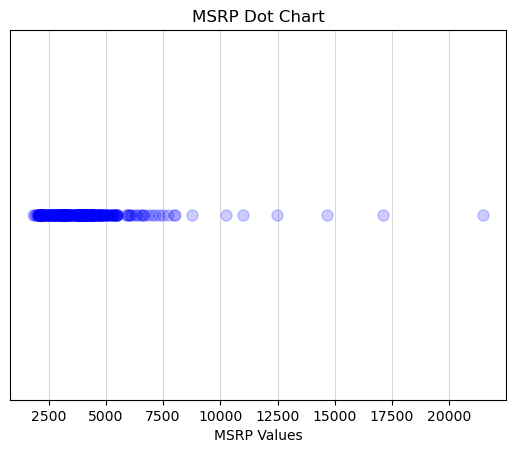

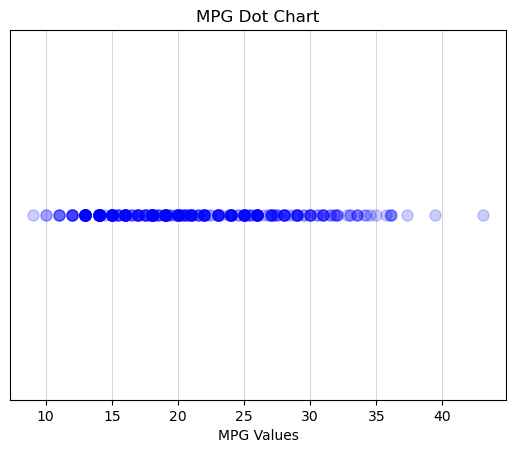

In [17]:
mpg_list = []
msrp_list = []
for row in combine_table:
    mpg_list.append(row['mpg'])
    msrp_list.append(row['msrp'])
    
dot_chart(msrp_list, "MSRP Values", "MSRP Dot Chart")
dot_chart(mpg_list, "MPG Values", "MPG Dot Chart")

### 17. Create pie and bar charts of number of cars by cylinders, by origin, and by year (six total charts)

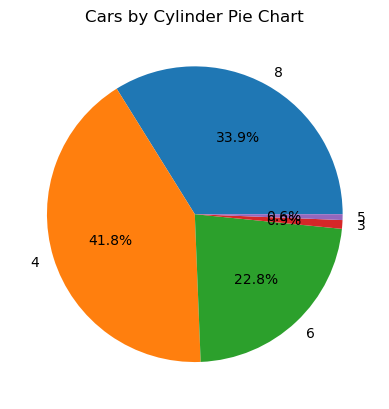

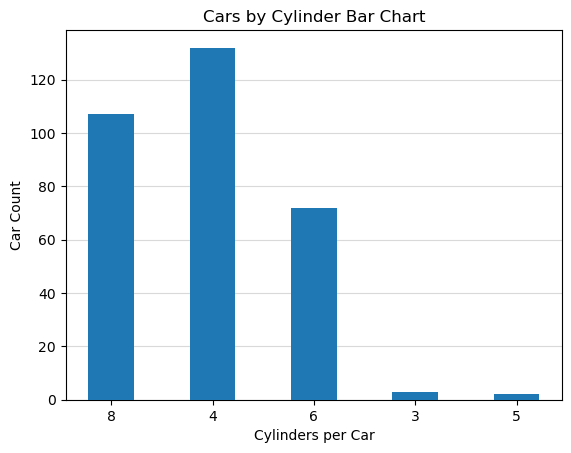

In [18]:
cylinder_list = partition(combine_table, ['cylinders'])
cylinder_val = []
cylinder_names = []

for part in cylinder_list:
    cylinder_val.append(part.row_count())
    cylinder_names.append(part[0]['cylinders'])

pie_chart(cylinder_val, cylinder_names, "Cars by Cylinder Pie Chart")
bar_chart(cylinder_val, cylinder_names, "Cylinders per Car", "Car Count", "Cars by Cylinder Bar Chart")

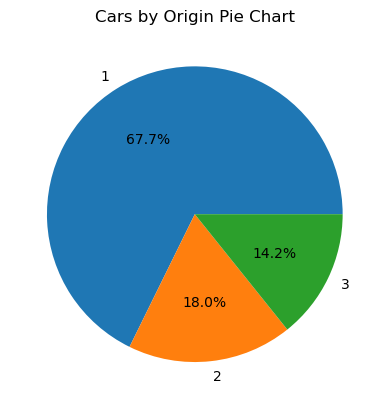

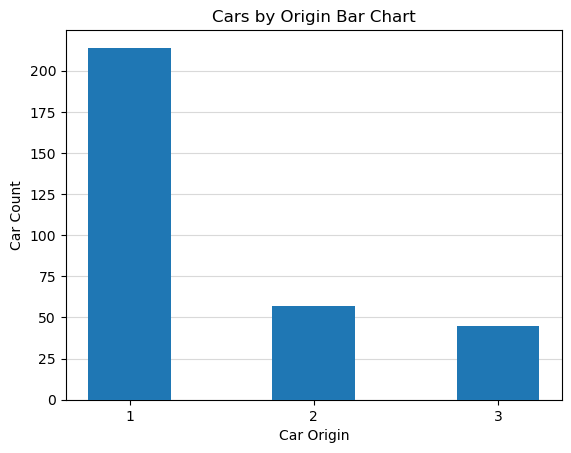

In [19]:
origin_list = partition(combine_table, ['origin'])
origin_val = []
origin_names = []

for part in origin_list:
    origin_val.append(part.row_count())
    origin_names.append(part[0]['origin'])
    
pie_chart(origin_val, origin_names, "Cars by Origin Pie Chart")
bar_chart(origin_val, origin_names, "Car Origin", "Car Count", "Cars by Origin Bar Chart")

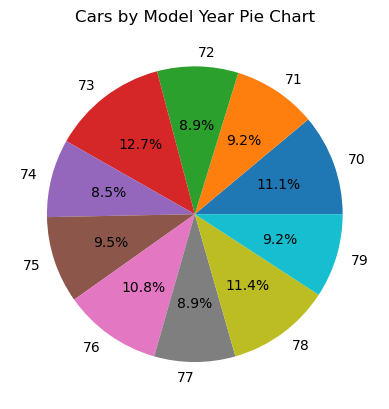

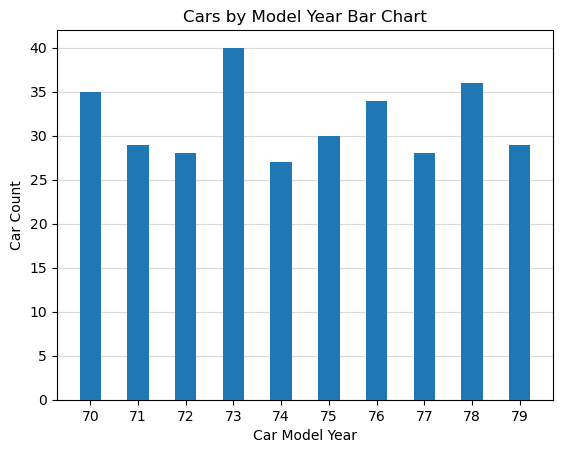

In [20]:
year_list = partition(combine_table, ['model year'])
year_val = []
year_names = []

for part in year_list:
    year_val.append(part.row_count())
    year_names.append(part[0]['model year'])
    
pie_chart(year_val, year_names, "Cars by Model Year Pie Chart")
bar_chart(year_val, year_names, "Car Model Year", "Car Count", "Cars by Model Year Bar Chart")

### 18. Create box and whisker plot of MPG by year, MPG by origin, and MPG by cylinders (three charts)

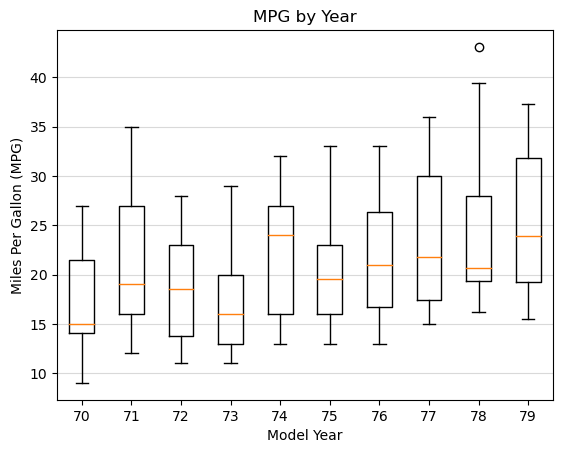

In [21]:
mpg_distributions = []
mpg_labels = []
for year in year_list:
    mpg_distributions.append([row['mpg'] for row in year])
    mpg_labels.append(year[0]['model year'])

box_plot(mpg_distributions, mpg_labels, "Model Year", "Miles Per Gallon (MPG)", "MPG by Year")

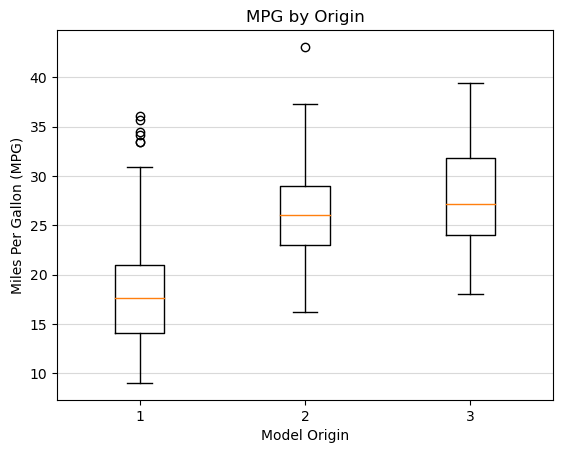

In [22]:
mpg_distributions = []
mpg_labels = []
for year in origin_list:
    mpg_distributions.append([row['mpg'] for row in year])
    mpg_labels.append(year[0]['origin'])

box_plot(mpg_distributions, mpg_labels, "Model Origin", "Miles Per Gallon (MPG)", "MPG by Origin")

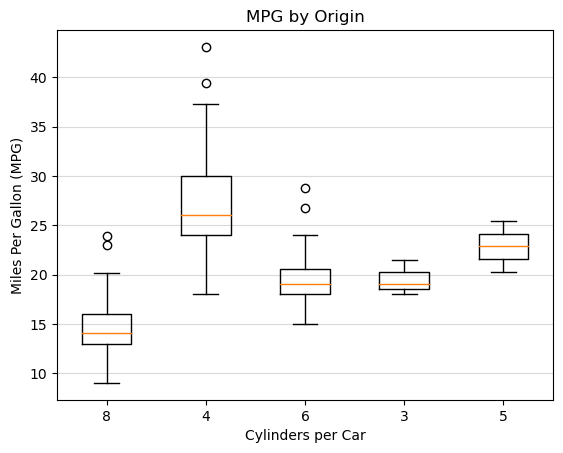

In [23]:
mpg_distributions = []
mpg_labels = []
for year in cylinder_list:
    mpg_distributions.append([row['mpg'] for row in year])
    mpg_labels.append(year[0]['cylinders'])

box_plot(mpg_distributions, mpg_labels, "Cylinders per Car", "Miles Per Gallon (MPG)", "MPG by Origin")

### 19. Create scatter plot of MSRP (x-axis) v. MPG (y-axis)

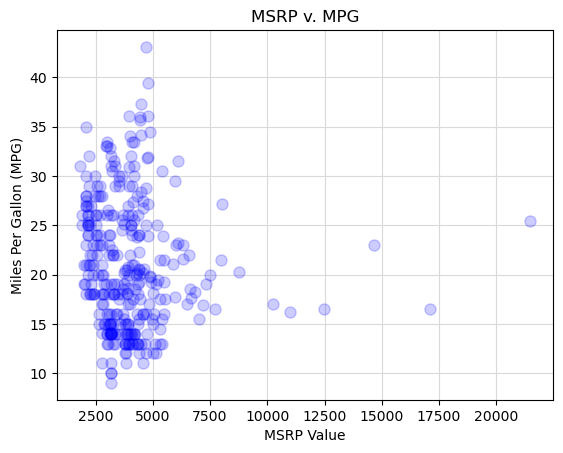

In [24]:
msrp_val = [row['msrp'] for row in combine_table]
mpg_val = [row['mpg'] for row in combine_table]

scatter_plot(msrp_val, mpg_val, "MSRP Value", "Miles Per Gallon (MPG)", "MSRP v. MPG")

### 20. Patterns in box plots and scatter plots

Even though MSRP may not be the best predictive indication of which cars have the best fuel efficiency, origin and year both produce a positive correlation in an increased distribution of MPG as model year and origin increase. A combination of the such could help accurately predict the MPG of a car. Morever, cylinder count could help indicate outliers as the 8 cylinder engine has a substantially lower MPG than the other cylinders. Utilzing and creating more cases for predictive conditions will always produce a more accurate guess in machine learning and prediction based modeling.